In [163]:
import pyautogui
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
screenWidth, screenHeight = pyautogui.size() # The primary monitor, in multi-monitor setups
currentMouseX, currentMouseY = pyautogui.position()
screenWidth, screenHeight

# from dataclasses import dataclass
# @dataclass
class Area:
    def __init__(self,tl,bl,tr,br):
        self.tl = tl
        self.bl = bl
        self.tr = tr
        self.br = br

    def check_screenshot(self,screenshot):
        screenshot_crop = screenshot[self.tl:self.bl,self.tr:self.br]
        return True





In [ ]:

# pyautogui.moveTo(747, 42) # Move the mouse to the x, y coordinates 100, 150.
# pyautogui.click() 
# pyautogui.moveTo(500, 500, duration=2, tween=pyautogui.easeInOutQuad) # Use tweening/easing function to move mouse over 2 seconds.
# pyautogui.write('.gitignore', interval=0.25)  # Type with quarter-second pause in between each key.
# pyautogui.press('return') # Simulate pressing the Escape key.
# pyautogui.keyDown('shift')
# pyautogui.write(['left', 'left', 'left', 'left', 'left', 'left'])
# pyautogui.keyUp('shift')
# pyautogui.hotkey('ctrl', 'c')

In [117]:
im1 = pyautogui.screenshot()
pil_image = im1.convert('RGB') 
# np.array(pil_image) 
# im1.save('my_screenshot.png')
# im1

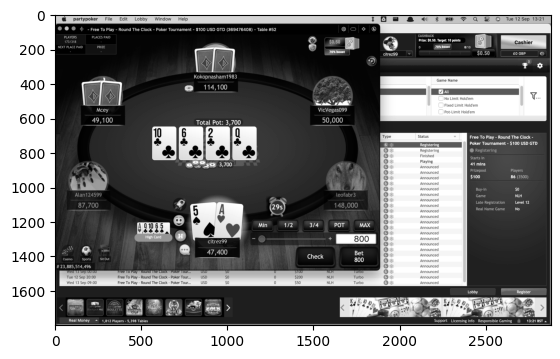

In [121]:
# from PIL import Image
img = cv.imread("setup4.png",cv.IMREAD_GRAYSCALE )
plt.imshow(img,cmap='gray')


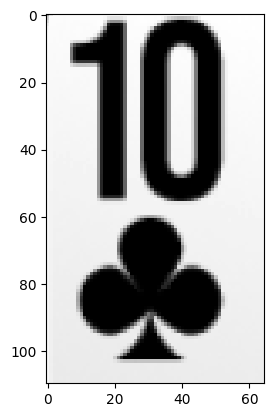

In [165]:
plt.imshow(img[ 655:765,565:630],cmap='gray')
# card1 = Area(655,765,565,630)
# card1

In [134]:

fold = Area(1352,1450, 1180,1350)



In [50]:
crop_img

array([[11, 11, 11, ..., 11, 11, 11],
       [11, 11, 11, ..., 11, 11, 11],
       [12, 11, 11, ..., 11, 11, 12],
       ...,
       [ 3,  3,  3, ...,  3,  2,  2],
       [ 3,  3,  3, ...,  2,  3,  2],
       [ 2,  3,  3, ...,  2,  2,  2]], dtype=uint8)

In [168]:
cv.imwrite('cards/c1/10c.png',img[655:765,565:630])

True

In [53]:
crop_img = img[fold.tl:fold.bl, fold.tr:fold.br]
# plt.imshow(crop_img,cmap = 'gray')
cv.imwrite("fold.png",crop_img)
# cv2.waitKey(0)



True

array([[11, 11, 11, ..., 11, 11, 11],
       [11, 11, 11, ..., 11, 11, 11],
       [12, 11, 11, ..., 11, 11, 12],
       ...,
       [ 3,  3,  3, ...,  3,  2,  2],
       [ 3,  3,  3, ...,  2,  3,  2],
       [ 2,  3,  3, ...,  2,  2,  2]], dtype=uint8)

In [104]:
fold_img  =cv.imread('fold.png',cv.IMREAD_GRAYSCALE)
def norm(im):
    return im/(np.sqrt(np.sum(im**2)))
# cv.resize(fold_img,(98,170))
# fold_img
# cv.resize(norm(fold_img),(98,170),interpolation = cv.INTER_CUBIC).size# * norm(img[fold.tl:fold.bl,fold.tr:fold.br])

In [108]:
np.sum(norm(fold_img)**2)


fold_img - 

28.48259341467043

In [111]:
np.sum(fold_img- img[fold.tl:fold.bl,fold.tr:fold.br])

0

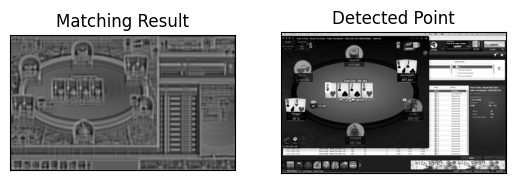

In [12]:

res = cv.matchTemplate(crop_img,img,method = cv.TM_CCOEFF_NORMED)
w, h = crop_img.shape[::-1]
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv.rectangle(img,top_left, bottom_right, 255, 18)
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()


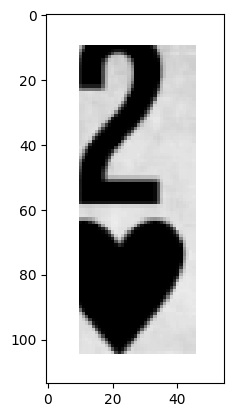

In [21]:
plt.imshow(img[top_left[1]:top_left[1] + h,top_left[0]:top_left[0]+w],cmap ='gray')

In [12]:
cv.rectangle(img,top_left, bottom_right, 255, 7)

array([[209, 209, 209, ..., 185, 184, 184],
       [209, 208, 209, ..., 184, 184, 184],
       [208, 209, 209, ..., 184, 184, 184],
       ...,
       [ 82,  82,  83, ..., 136, 134, 137],
       [ 83,  84,  81, ..., 136, 135, 136],
       [ 84,  82,  82, ..., 134, 137, 138]], dtype=uint8)

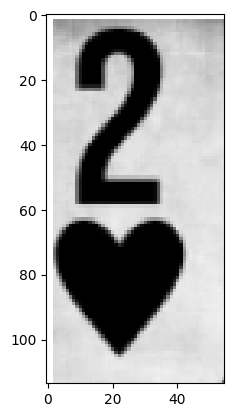

In [8]:
plt.imshow(crop_img,cmap = 'gray')

In [5]:
from PIL import Image
from pytesseract import pytesseract
for i in range(1,10):
    path = '7_s'.png'
    img = Image.open(path)
    # img = img.convert('RGB')
    # img.save('my_screenshot.jpg')

    text = pytesseract.image_to_string(img)
    # Displaying the extracted text
    print(f"path: {p}\ttext: {text}")
    img


SyntaxError: unterminated string literal (detected at line 4) (1951901335.py, line 4)

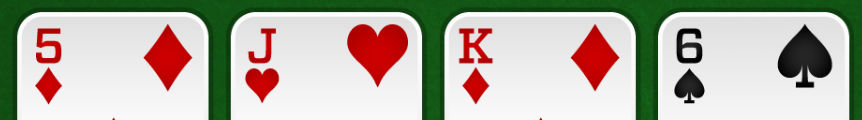

In [35]:
img

In [22]:
# Import required packages
import cv2
import pytesseract

# Mention the installed location of Tesseract-OCR in your system
# pytesseract.pytesseract.tesseract_cmd = 'System_path_to_tesseract.exe'

# Read image from which text needs to be extracted
img = cv2.imread("my_screenshot.jpg")

# Preprocessing the image starts

# Convert the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

# Specify structure shape and kernel size.
# Kernel size increases or decreases the area
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
												cv2.CHAIN_APPROX_NONE)

# Creating a copy of image
im2 = img.copy()

# A text file is created and flushed
file = open("recognized.txt", "w+")
file.write("")
file.close()

# Looping through the identified contours
# Then rectangular part is cropped and passed on
# to pytesseract for extracting text from it
# Extracted text is then written into the text file
for cnt in contours:
	x, y, w, h = cv2.boundingRect(cnt)
	
	# Drawing a rectangle on copied image
	rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
	
	# Cropping the text block for giving input to OCR
	cropped = im2[y:y + h, x:x + w]
	
	# Open the file in append mode
	file = open("recognized.txt", "a")
	
	# Apply OCR on the cropped image
	text = pytesseract.image_to_string(cropped)
	
	# Appending the text into file
	file.write(text)
	file.write("\n")
	
	# Close the file
	file.close


TypeError: Unsupported image object

In [88]:
import cv2
button7location = pyautogui.locateOnScreen('a_d.png',confidence = 0.7)
button7location

In [89]:
pyautogui.moveTo(button7location.left,button7location.top)


AttributeError: 'NoneType' object has no attribute 'left'

In [77]:
x,y = pyautogui.center(button7location)
x,y


(370, 379)